# Data Science & Buisness Analytics Intern @ The Sparks Foundation
## GRIP MAY'21

# Author - Akshita Singla

## Task1: Prediction using Supervised ML

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Importing the Dataset

In [15]:
data= pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [16]:
print('data is imported successfully')

data is imported successfully


In [17]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Checking for Missing values

In [19]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [20]:
#Now we will look at some descriptive statistics of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

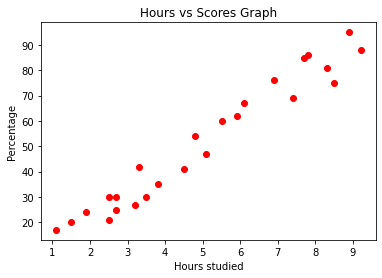

In [23]:
# Plotting the data points of scores vs hours to find any relationship between the two variables
plt.scatter(data['Hours'],data['Scores'], color= 'red')
plt.xlabel('Hours studied')
plt.ylabel('Percentage')
plt.title('Hours vs Scores Graph')
plt.show

In [24]:
#Checking the correlation
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Simple Linear Regression Model

In [26]:
# selecting x and y from the data
x= data.iloc[:, :-1]
# x represents the values in 'Hours' column of the data
y= data.iloc[:, -1]
# y represents the values in 'Scores' column of the data

In [27]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

In [28]:
#Training the simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

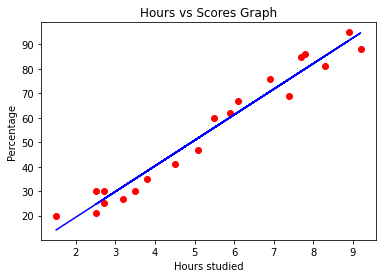

In [33]:
#Visualising the Training set results
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.xlabel('Hours studied')
plt.ylabel('Percentage')
plt.title('Hours vs Scores Graph')
plt.show

## Prediction of values

In [30]:
#Predicting the test set results on the basis of our trained model
y_pred= regressor.predict(x_test)
y_pred

array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])

In [32]:
#Comparing the actual values to our predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
14,17,9.970262
13,42,32.984700
17,24,18.339148
3,75,87.382463
21,54,48.676362


## Predicting the percentage based on No. of Hours

In [29]:
input= float(input('The No. of Hours studied is: '))
result= regressor.predict([[9.25]])
print('The predicted score is:',result)

The No. of Hours studied is: 9.25
The predicted score is: [95.22829438]


In [34]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error is:', mean_absolute_error(y_test,y_pred))

Mean absolute error is: 7.882398086270432
